In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import xgboost
import shap


# Read data from '2class.csv' file
data = pd.read_csv('2classdata.csv')



# Use the last column as the target variable and the remaining columns as features
y = data.iloc[:, -1]
X = data.iloc[:, :-1]


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use SMOTE to oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier model
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

# Predict labels for training and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Predict probabilities of survival
y_prob_train = model.predict_proba(X_train)
y_prob_test = model.predict_proba(X_test)

# Save the resampled data and labels to a new CSV file
resampled_data = pd.DataFrame(np.column_stack((X_resampled, y_resampled)), columns=data.columns)
resampled_data.to_csv('resampled_data.csv', index=False)

/environment/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)

print (f'Accuracy of predicting training data = {accuracy_train:0.3f}')
print (f'Accuracy of predicting test data = {accuracy_test:0.3f}')

Accuracy of predicting training data = 1.000
Accuracy of predicting test data = 0.705


In [6]:
# Read data from '2class.csv' file
data2 = pd.read_csv('resampled_data.csv')

X2 = data2.iloc[:, :-1]


In [7]:
# build an Exact explainer and explain the model predictions on the given dataset
explainer = shap.TreeExplainer(model)
shap_values = explainer(X2)

In [8]:
# Calculate the average absolute value of positive and negative contributions for each feature
feature_importances = []
feature_signs = []
for i, feature in enumerate(data2.columns[:-1]):
    pos_contrib = shap_values.values[:, i][shap_values.values[:, i] >= 0].mean()
    neg_contrib = shap_values.values[:, i][shap_values.values[:, i] < 0].mean()
    
    # Determine the overall contribution sign
    if abs(pos_contrib) >= abs(neg_contrib):
        feature_sign = 1
    else:
        feature_sign = -1
    
    # Calculate the maximum absolute contribution
    feature_importance = max(abs(pos_contrib), abs(neg_contrib))
    
    feature_importances.append(feature_importance)
    feature_signs.append(feature_sign)

# Create a new DataFrame with the feature importances and signs
shap_values_df = pd.DataFrame({"特征": data2.columns[:-1], "重要性": feature_importances, "符号": feature_signs})

# Save feature importance to CSV
shap_values_df.to_csv('features_importance.csv', index=False)

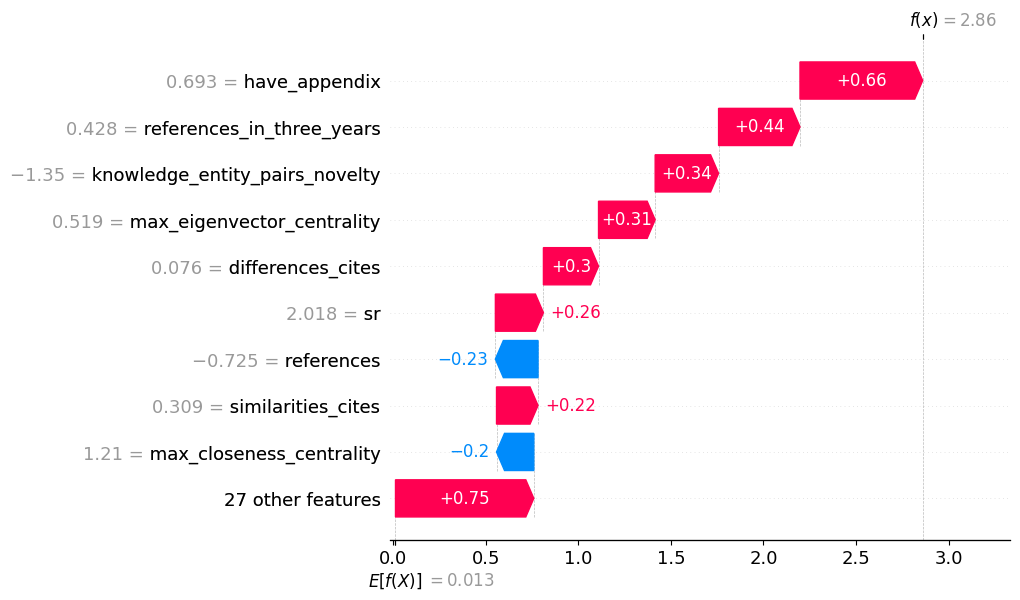

In [9]:

shap_plot = shap.plots.waterfall(shap_values[82])



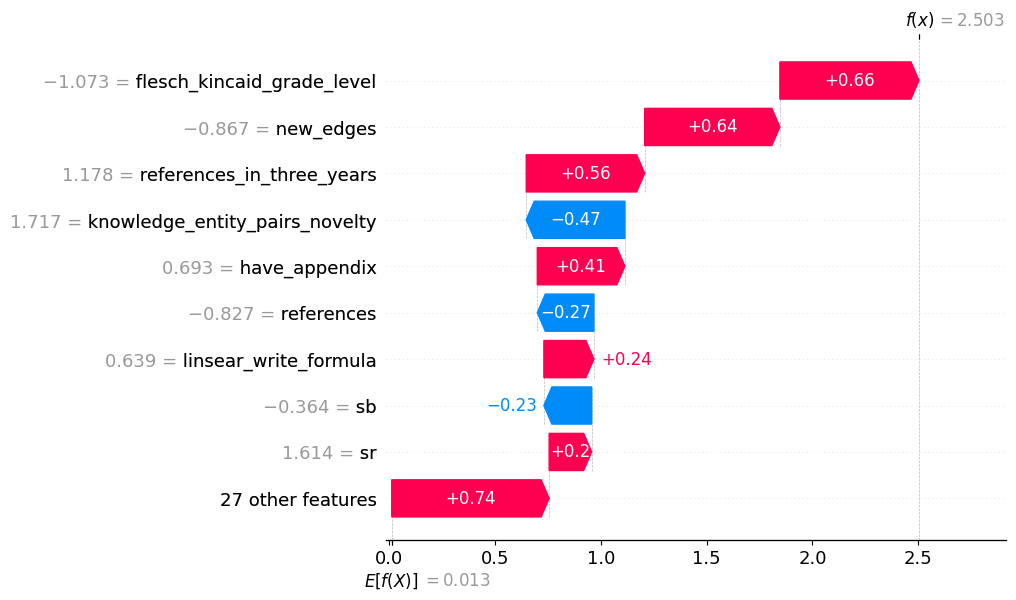

In [10]:
shap_plot = shap.plots.waterfall(shap_values[892])


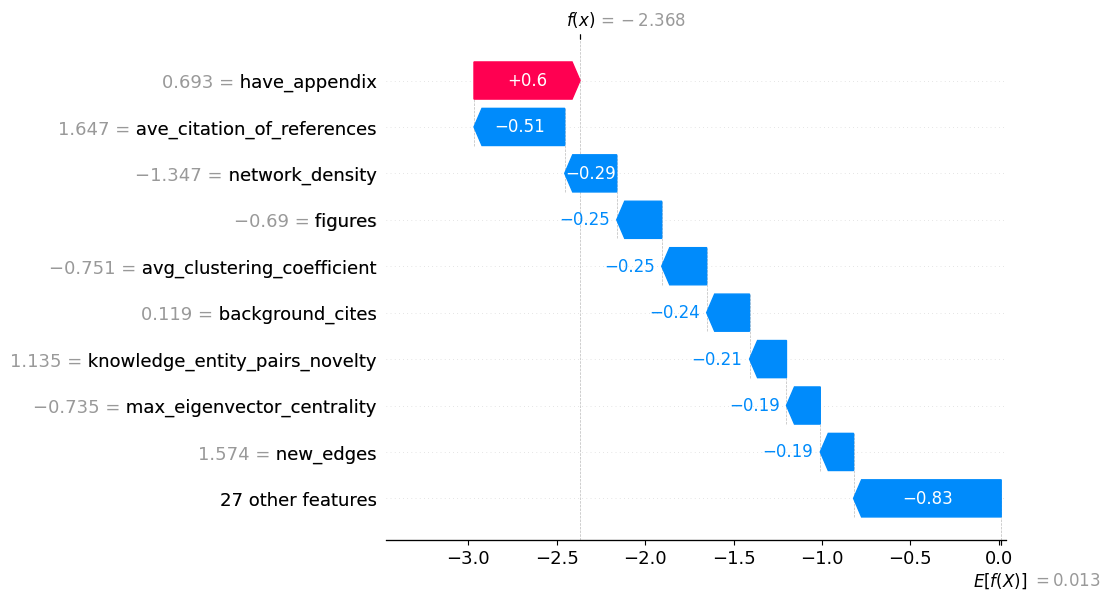

In [11]:
shap.plots.waterfall(shap_values[92])

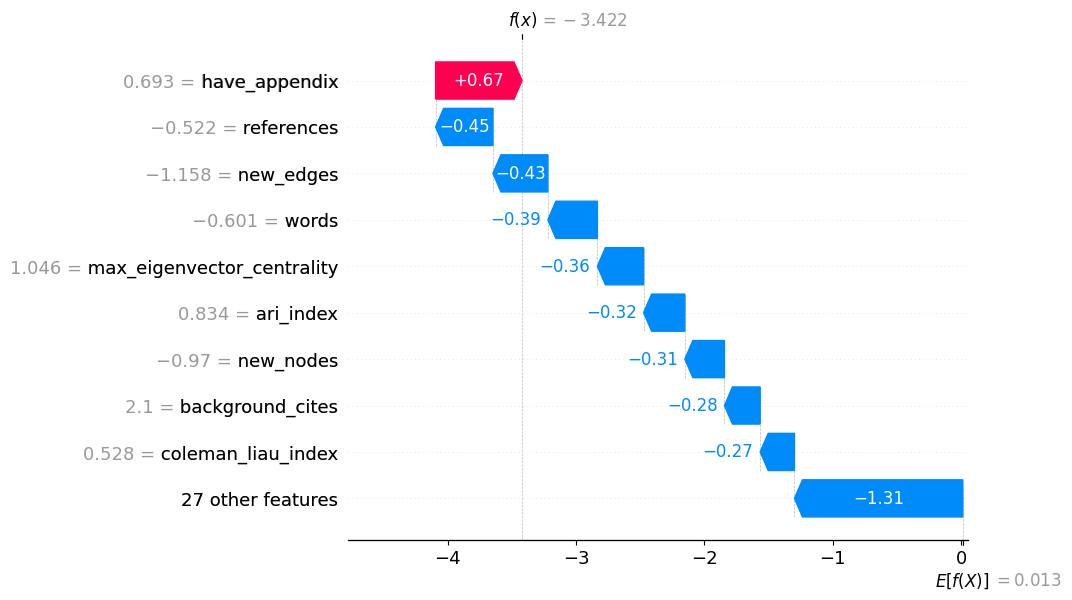

In [12]:
shap.plots.waterfall(shap_values[142])

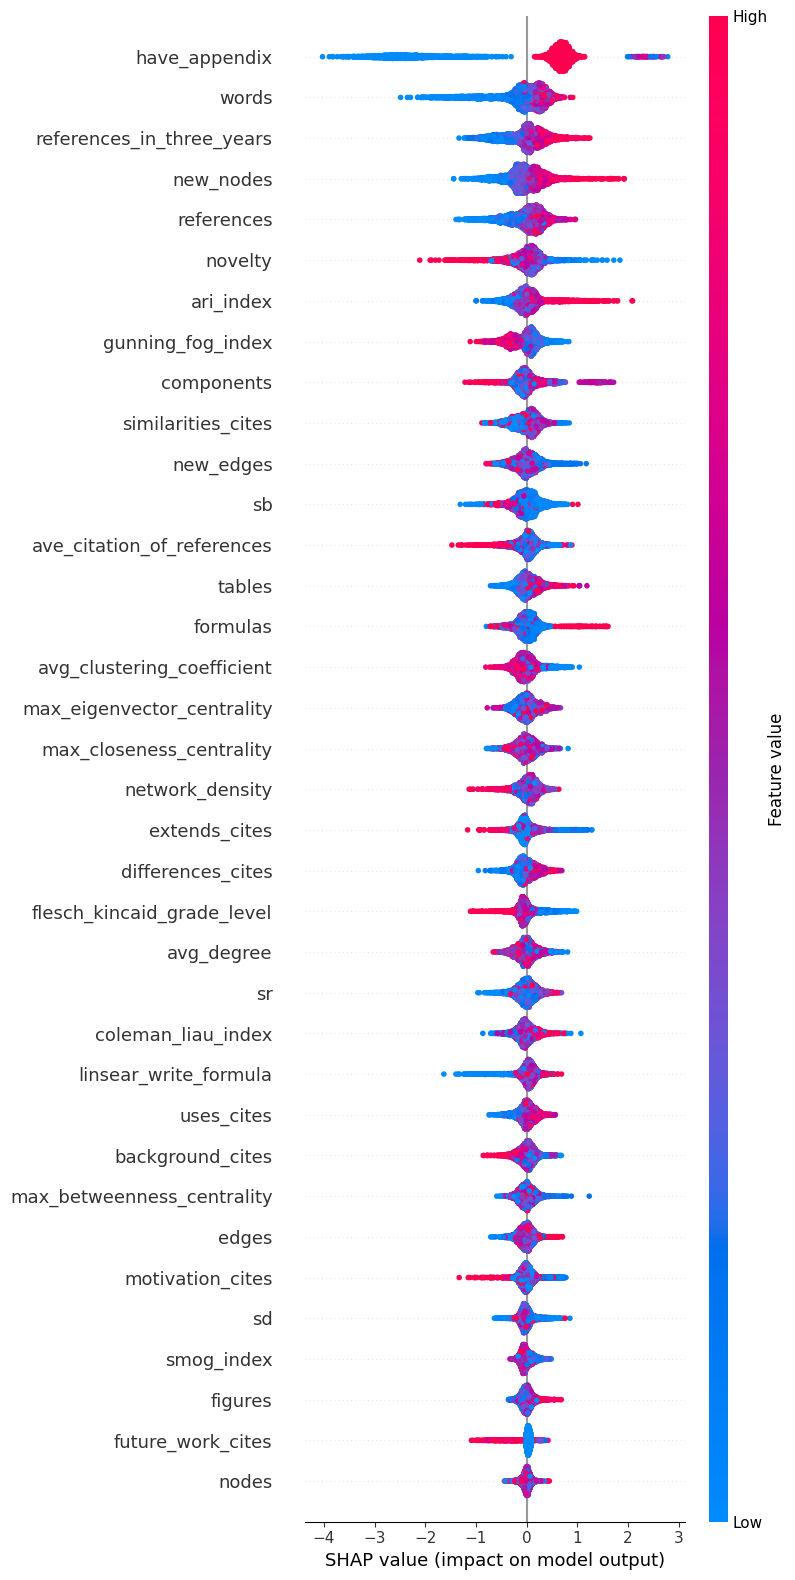

In [47]:

shap.summary_plot(shap_values = shap_values, max_display=36)

In [3]:
pip install shap

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 163.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 180.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 131.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.



KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7f809dc9e560> (for post_execute):
